<a href="https://colab.research.google.com/github/daeyeong8855/statistical_data_analysis/blob/main/%ED%86%B5%EA%B3%84_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%83%81%EA%B4%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd

tips_data = sns.load_dataset('tips')
print(tips_data)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [ ]:
corr = tips_data[['total_bill','tip']].corr()
print(corr)

            total_bill       tip
total_bill    1.000000  0.675734
tip           0.675734  1.000000


In [ ]:
corr = tips_data['total_bill'].corr(tips_data['tip'], method='pearson')
print(corr)

0.6757341092113641


In [ ]:
# 공분산
covariance = tips_data['total_bill'].cov(tips_data['tip'])
print(covariance)

8.323501629224854


<Axes: xlabel='total_bill', ylabel='tip'>

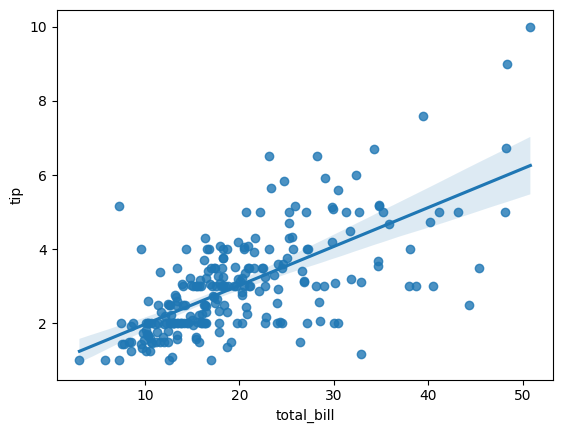

In [ ]:
sns.regplot(x='total_bill', y='tip', data=tips_data)

In [ ]:
# 다중상관분석
cols = ['survived', 'pclass','age','fare']

df = sns.load_dataset('titanic')[cols].dropna()
print(df.corr())

          survived    pclass       age      fare
survived  1.000000 -0.359653 -0.077221  0.268189
pclass   -0.359653  1.000000 -0.369226 -0.554182
age      -0.077221 -0.369226  1.000000  0.096067
fare      0.268189 -0.554182  0.096067  1.000000


             Samsung        LG
Date                          
2021-01-04       NaN       NaN
2021-01-05 -0.015075  0.009307
2021-01-06 -0.033101 -0.029463
2021-01-07  0.061637  0.011961
2021-01-08 -0.028077 -0.002870
...              ...       ...
2021-04-09  0.058732  0.015152
2021-04-10  0.033889 -0.000616
2021-04-11  0.009776  0.016325
2021-04-12 -0.052736 -0.072594
2021-04-13  0.002162  0.021234

[100 rows x 2 columns]


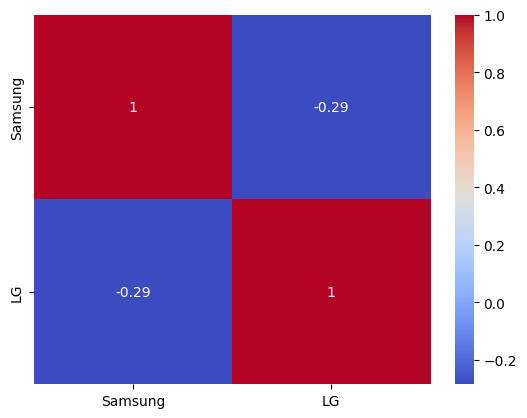

In [ ]:
# 시계열 상관 분석

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os

# 랜덤하게 주식 가격 100개의 데이터 생성
dates = pd.date_range(start='2021-01-04', periods=100, freq='D')
samsung_prices = [random.randint(80000,90000) for _ in range(100)]
samsung_data = {'Date' : dates, '005930.KS' : samsung_prices} #딕셔너리
samsung_df = pd.DataFrame(samsung_data)
samsung_df.set_index('Date', inplace=True)

LG_prices = [random.randint(140000,160000) for _ in range(100)]
LG_data = {'Date' : dates, '066570.KS' : LG_prices} #딕셔너리
LG_df = pd.DataFrame(LG_data)
LG_df.set_index('Date', inplace=True)

#합치기
df = pd.concat([samsung_df, LG_df], axis=1)
df = df.loc[:,['005930.KS','066570.KS']]
df.columns = ['Samsung', "LG"]

#폴더생성, 파일생성
os.makedirs("./data", exist_ok=True)
df.to_csv("./data/stock_price.csv")

# csv 읽기
df = pd.read_csv('./data/stock_price.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# 두 종목의 수익률 계산
returns = df.pct_change()
print(returns)

corr_matrix = returns.corr()

# 히트맵
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()